# Bandpass Filtering EEG Data
 In this notebook, we apply bandpass filtering to EEG data using MNE-Python. Filtering helps remove noise and retain the relevant frequency bands (e.g., 1–40 Hz).


In [4]:
# Import libraries
import mne
import numpy as np
import matplotlib.pyplot as plt


## Load Raw EEG Data
Using the same EEGBCI dataset as in the previous notebook.


In [14]:
from mne.datasets import eegbci
from mne.io import read_raw_edf
from mne import concatenate_raws

subject = 1
runs = [1]
raw_fnames = eegbci.load_data(subject, runs)
raw = read_raw_edf(raw_fnames[0], preload=True)

# Pick EEG channels only
raw = mne.concatenate_raws(raw_list)
raw.pick('eeg', exclude='bads')


Extracting EDF parameters from C:\Users\circu\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


<RawEDF | S001R01.edf, 64 x 69280 (433.0 s), ~33.9 MiB, data loaded>

## Plot Raw Signal (Unfiltered)

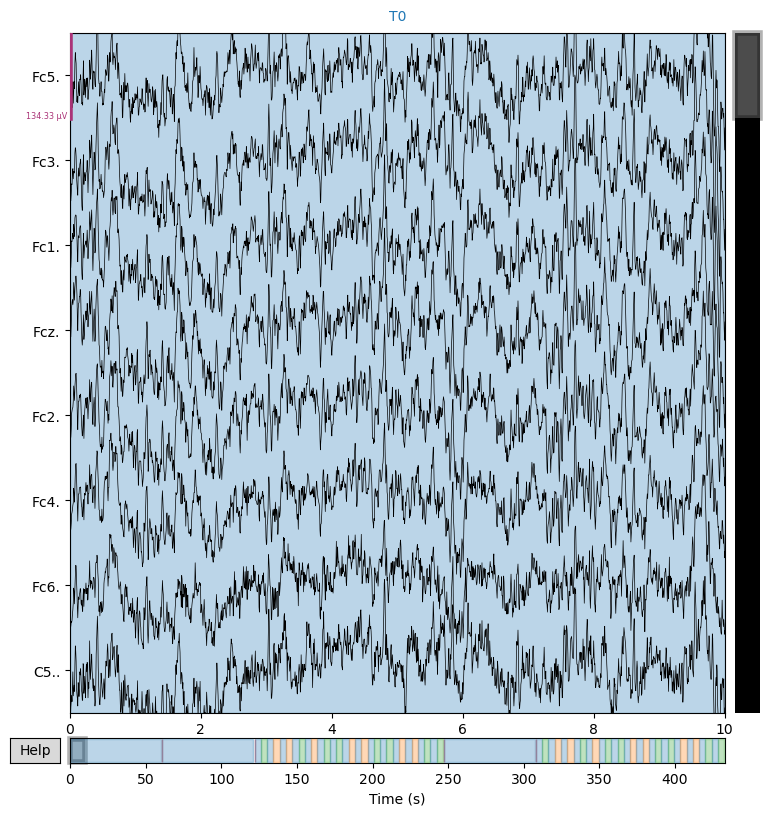

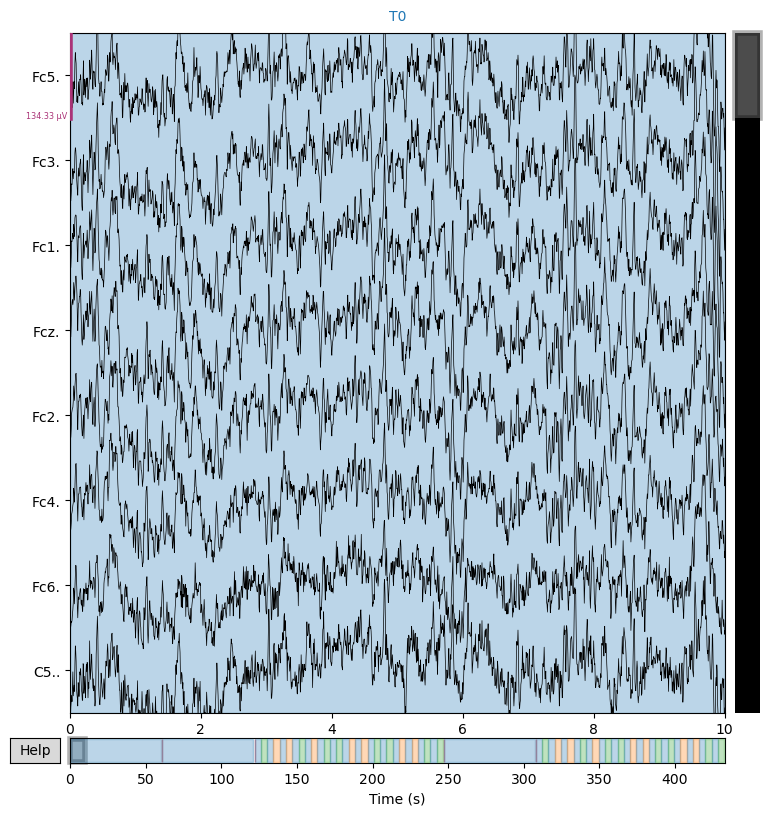

In [15]:
# Plot 10 seconds of unfiltered EEG
raw.plot(n_channels=8, duration=10, scalings='auto', title='Unfiltered EEG Signal')


## Apply Bandpass Filter
We’ll apply a filter from 1 to 40 Hz, which is a common setting for cognitive state analysis.


Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



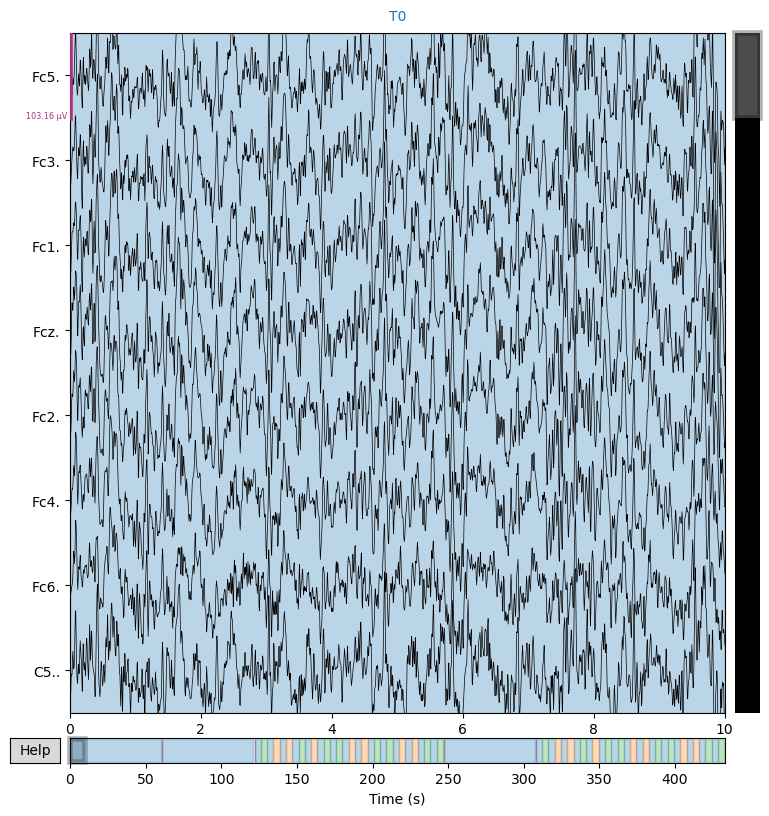

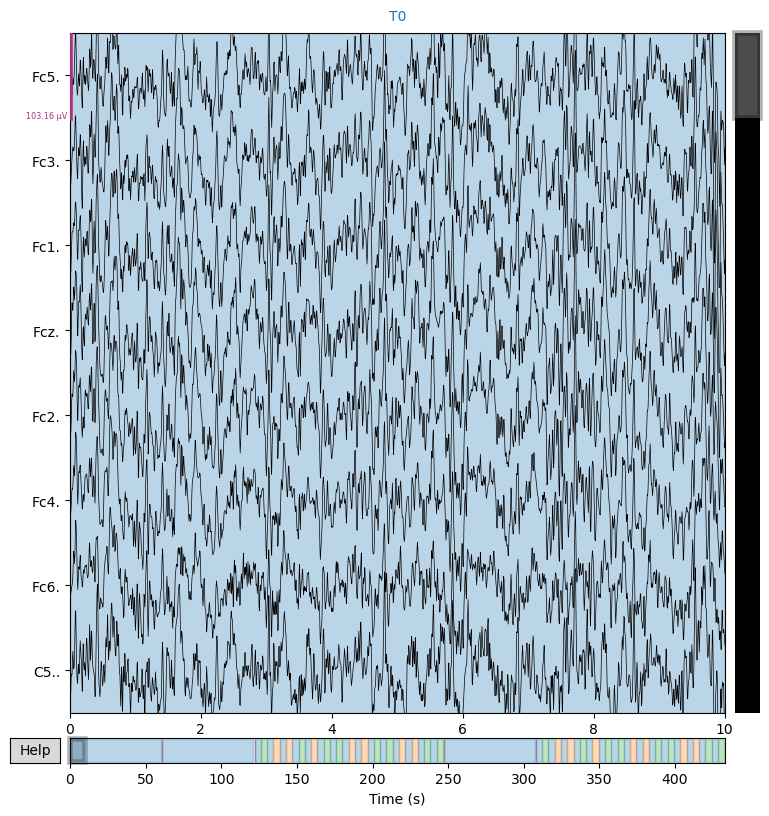

In [16]:
# Copy raw to preserve original
raw_filtered = raw.copy().filter(l_freq=1., h_freq=40.)

# Plot the filtered signal
raw_filtered.plot(n_channels=8, duration=10, scalings='auto', title='Filtered EEG Signal (1-40 Hz)')


## Summary:
- Filtering removed slow drifts (<1 Hz) and high-frequency noise (>40 Hz)
- Retained frequency bands relevant for cognitive activity (Delta to Gamma)

This filtered signal is cleaner and ready for event detection, epoching, or feature extraction in later steps.
